In [14]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [15]:
current_dir = os.getcwd()
scripts = os.path.dirname(current_dir)
parent_dir = os.path.dirname(scripts)
parent_dir

'd:\\Cours_M2\\webscraping\\ml-webscrap-tennis'

In [16]:
dataset_path = os.path.join(parent_dir, "data", "tennis_dataset_clean_essaie.csv")
df = pl.read_csv(dataset_path)

df = df.drop("player1_name", "player2_name", "index", "date") 

In [17]:
X, y = df.drop("target"), df.select("target")

In [18]:
X = X.to_numpy()
y = y.to_numpy().flatten()

In [19]:
print(sum(y == 0))
print(sum(y == 1))

1526
1526


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state= 1)

In [21]:
print(sum(y_train == 0))
print(sum(y_train == 1))

1130
1159


# Modèle 

In [22]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score, classification_report,mean_squared_error, r2_score
import xgboost as xgb

## Gradient Boosting

In [45]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(
    GradientBoostingClassifier(learning_rate= 0.1, max_depth= 2, n_estimators= 200, subsample= 0.7),
    threshold="median"
)
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
X_test_l1 = select.transform(X_test)
score = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 2, n_estimators= 200, subsample= 0.7).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))


Test score: 0.624
X_train.shape: (2289, 66)
X_train_l1.shape: (2289, 33)


In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# Sélection des features avec SelectFromModel
select = SelectFromModel(
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    threshold="median"
)
select.fit(X_train, y_train)

# Transformation des données
X_train_l1 = select.transform(X_train)
X_test_l1 = select.transform(X_test)

# Modèle sur données réduites
clf_reduced = GradientBoostingClassifier(learning_rate=0.1, max_depth=2, n_estimators=200, subsample=0.7)
clf_reduced.fit(X_train_l1, y_train)
y_pred_l1 = clf_reduced.predict(X_test_l1)
score_l1 = accuracy_score(y_test, y_pred_l1)

# Modèle sur données complètes
clf_full = GradientBoostingClassifier(learning_rate=0.1, max_depth=2, n_estimators=200, subsample=0.7)
clf_full.fit(X_train, y_train)
y_pred_full = clf_full.predict(X_test)
score_full = accuracy_score(y_test, y_pred_full)

# Comparaison des résultats
print("Accuracy with all features: {:.3f}".format(score_full))
print("Accuracy with selected features: {:.3f}".format(score_l1))
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))


Accuracy with all features: 0.636
Accuracy with selected features: 0.646
X_train.shape: (2289, 66)
X_train_l1.shape: (2289, 33)


-------------------------------------------------------------------------------------------------------------------------------------------

In [24]:
gradient_model = GradientBoostingClassifier()

In [ ]:
param_grid_gradient = {
    'n_estimators' : [50, 100 ,150 ,200],
    'learning_rate' : [0.01, 0.1],
    'max_depth' : [1, 2, 3],
    'subsample' : [0.7, 0.8, 1.0]
}

grid_search_gradient = GridSearchCV(gradient_model, param_grid_gradient, cv=5, verbose=2) 
grid_search_gradient.fit(X_train, y_train)
print("Meilleurs paramètres (Regression Logistic):\n", grid_search_gradient.best_params_)

results_gradient = pl.DataFrame(grid_search_gradient.cv_results_)
display(results_gradient.filter(pl.col('rank_test_score') <= 6).head(6))
best_gradient = grid_search_gradient.best_estimator_
best_gradient.fit(X_train, y_train)

print("Training set score: {:.3f}".format(best_gradient.score(X_train, y_train)))
print("Test set score: {:.3f}".format(best_gradient.score(X_test, y_test)))

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END learning_rate=0.001, max_depth=1, n_estimators=50, subsample=0.5; total time=   1.0s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=50, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=50, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=50, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=50, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=50, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=50, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=50, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=50, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=50, subsample=0.7; total time=   0.

mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
f64,f64,f64,f64,f64,i64,i64,f64,struct[4],f64,f64,f64,f64,f64,f64,f64,i32
11.73147,0.850279,0.008108,0.001117,0.01,4,200,0.7,"{0.01,4,200,0.7}",0.659389,0.672489,0.633188,0.615721,0.66302,0.648761,0.02104,4
2.100456,0.229167,0.003797,0.000864,0.1,1,150,0.5,"{0.1,1,150,0.5}",0.659389,0.665939,0.644105,0.620087,0.647702,0.647444,0.015776,5
1.731419,0.081948,0.002991,0.000499,0.1,2,50,0.8,"{0.1,2,50,0.8}",0.639738,0.703057,0.626638,0.641921,0.652079,0.652686,0.026456,2
2.470157,0.271436,0.004178,0.000823,0.1,2,100,0.5,"{0.1,2,100,0.5}",0.650655,0.676856,0.652838,0.60917,0.656455,0.649195,0.022069,3
4.790381,0.337813,0.007213,0.005052,0.1,2,150,0.5,"{0.1,2,150,0.5}",0.648472,0.672489,0.646288,0.624454,0.645514,0.647443,0.015244,6
6.236609,0.245814,0.005746,0.001362,0.1,2,200,0.7,"{0.1,2,200,0.7}",0.659389,0.672489,0.648472,0.622271,0.665208,0.653566,0.017509,1


Training set score: 0.815
Test set score: 0.654


Accuracy (Régression Logistique): 0.6409


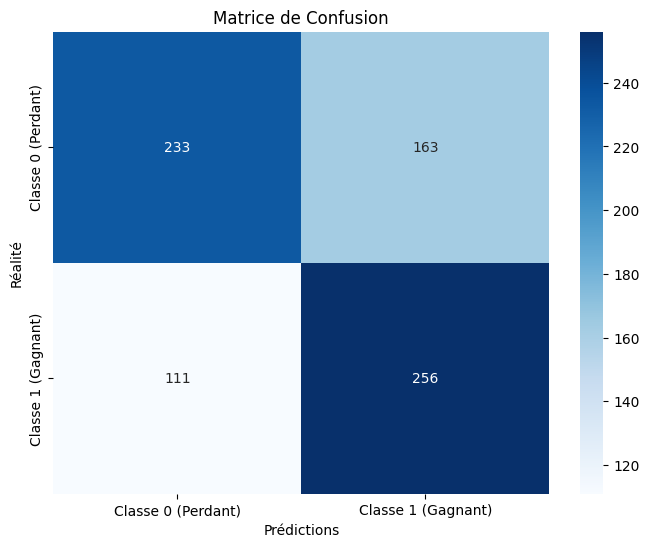

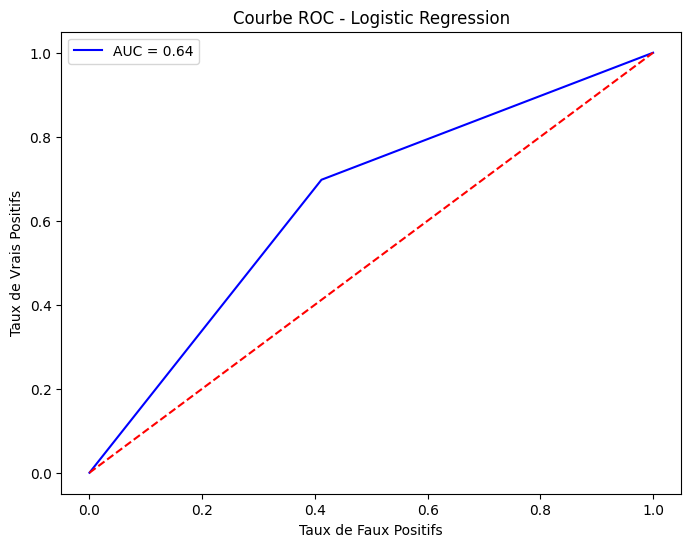

In [30]:
y_pred_gradient = best_gradient.predict(X_test)

# threshold = 0.1 # Vous pouvez ajuster ce seuil
# y_pred_binary_logreg = (y_pred_logreg >= threshold).astype(int)

accuracy_gradient = accuracy_score(y_test, y_pred_gradient)
print(f"Accuracy (Régression Logistique): {accuracy_gradient:.4f}")
# y_pred_binary_log = (y_pred_logreg >= 1).astype(int)
cm_gradient  = confusion_matrix(y_test, y_pred_gradient)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gradient, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'], yticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion')
plt.show()

fpr_gradient, tpr_gradient, _ = roc_curve(y_test, y_pred_gradient)
roc_auc_gradient = roc_auc_score(y_test, y_pred_gradient)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gradient, tpr_gradient, color='blue', label=f'AUC = {roc_auc_gradient:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - Logistic Regression')
plt.legend()
plt.show()



## Régression linéaire

In [12]:
linear_r = LinearRegression()
linear_r.fit(X_train, y_train)

y_pred_linear = linear_r.predict(X_test)

In [13]:
print("Training set score: {:.2f}".format(linear_r.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linear_r.score(X_test, y_test)))
# Pas d'overfitting

Training set score: 0.18
Test set score: 0.16


In [14]:
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.21018235105966498
R² Score: 0.15902646643261775


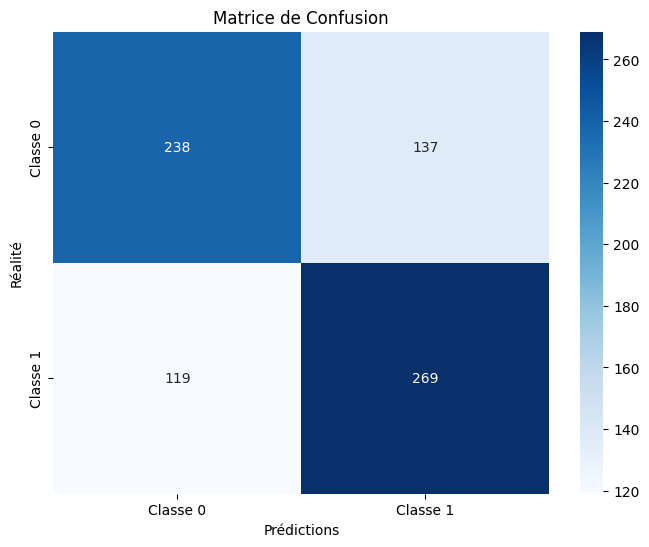

In [15]:
y_pred_binary = (y_pred_linear >= 0.5).astype(int)

cm_linear = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion')
plt.show()


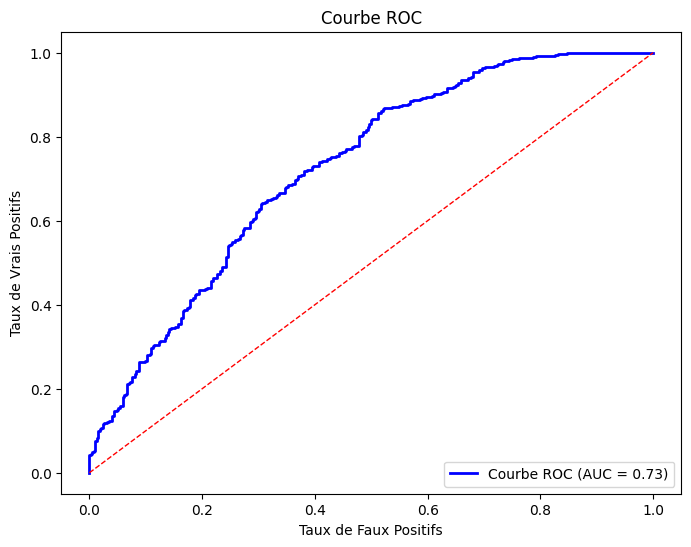

In [16]:
fpr_linear, tpr_linear, thresholds_linear = roc_curve(y_test, y_pred_linear)  
roc_auc_linear = auc(fpr_linear, tpr_linear)
# print(thresholds_linear)

plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, color='blue', lw=2, label='Courbe ROC (AUC = {:.2f})'.format(roc_auc_linear))
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


## Ridge

In [17]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.18
Test set score: 0.16


In [61]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.19
Test set score: 0.14


In [62]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.19
Test set score: 0.14


## Lasso

In [63]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 0.14
Test set score: 0.14


## Régression logistique

In [33]:
logreg_model  = LogisticRegression(solver='liblinear', max_iter=10_000)

### Grid

In [46]:
param_grid_logreg = {
    'C': [5, 10, 50, 100],
    'solver': ['liblinear']
}

grid_search_logreg = GridSearchCV(logreg_model, param_grid_logreg, cv=5, verbose=2) 
grid_search_logreg.fit(X_train, y_train)
print("Meilleurs paramètres (Regression Logistic):\n", grid_search_logreg.best_params_)

results_logreg = pl.DataFrame(grid_search_logreg.cv_results_)
display(results_logreg.head(6))
best_logreg_model = grid_search_logreg.best_estimator_
best_logreg_model.fit(X_train, y_train)

print("Training set score: {:.3f}".format(best_logreg_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(best_logreg_model.score(X_test, y_test)))



Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................C=5, solver=liblinear; total time=   0.8s
[CV] END ..............................C=5, solver=liblinear; total time=   0.1s
[CV] END ..............................C=5, solver=liblinear; total time=   0.2s
[CV] END ..............................C=5, solver=liblinear; total time=   0.3s
[CV] END ..............................C=5, solver=liblinear; total time=   0.2s
[CV] END .............................C=10, solver=liblinear; total time=   0.3s
[CV] END .............................C=10, solver=liblinear; total time=   0.2s
[CV] END .............................C=10, solver=liblinear; total time=   0.4s
[CV] END .............................C=10, solver=liblinear; total time=   0.2s
[CV] END .............................C=10, solver=liblinear; total time=   0.3s
[CV] END .............................C=50, solver=liblinear; total time=   0.2s
[CV] END .............................C=50, solve

mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
f64,f64,f64,f64,i64,str,struct[2],f64,f64,f64,f64,f64,f64,f64,i32
0.431742,0.246033,0.002123,0.001071,5,"""liblinear""","{5,""liblinear""}",0.648472,0.672489,0.644105,0.604803,0.625821,0.639138,0.022717,3
0.367058,0.070119,0.002529,0.002328,10,"""liblinear""","{10,""liblinear""}",0.637555,0.674672,0.659389,0.606987,0.634573,0.642635,0.023103,1
0.216091,0.050378,0.001473,0.00027,50,"""liblinear""","{50,""liblinear""}",0.633188,0.670306,0.646288,0.600437,0.632385,0.636521,0.022659,4
0.199902,0.075616,0.001209,0.000406,100,"""liblinear""","{100,""liblinear""}",0.644105,0.665939,0.661572,0.604803,0.630197,0.641323,0.022276,2


Training set score: 0.671
Test set score: 0.658


Accuracy (Régression Logistique): 0.6579


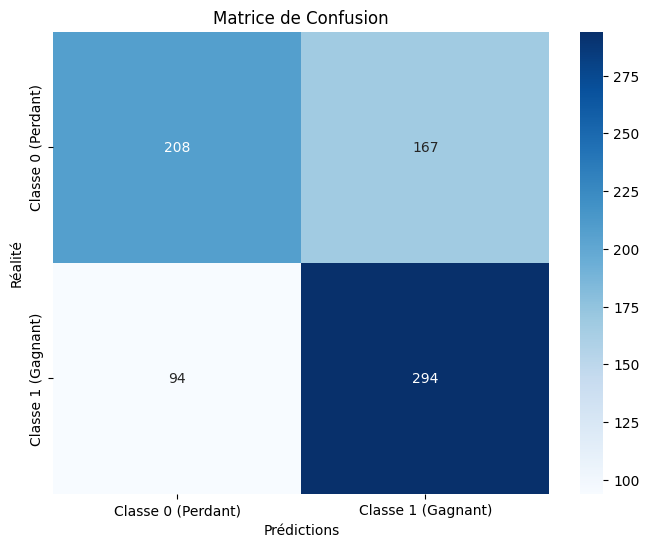

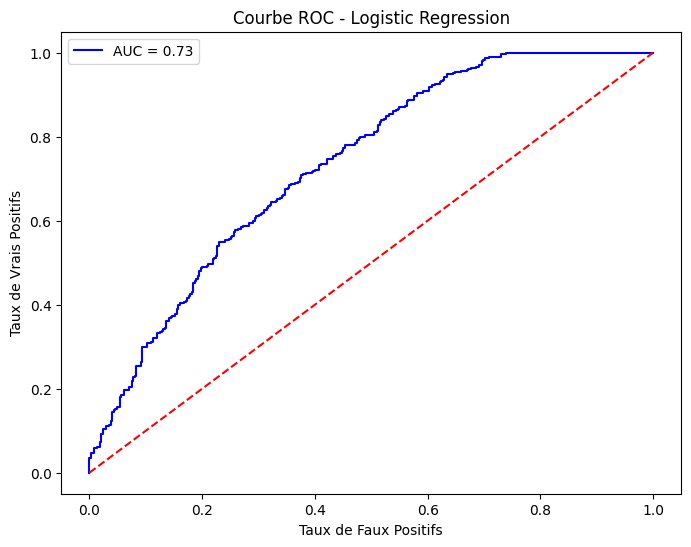

In [61]:
y_pred_logreg = best_logreg_model.predict(X_test)

# threshold = 0.1 # Vous pouvez ajuster ce seuil
# y_pred_binary_logreg = (y_pred_logreg >= threshold).astype(int)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy (Régression Logistique): {accuracy_logreg:.4f}")
y_pred_binary_log = (y_pred_logreg >= 1).astype(int)
cm_logreg  = confusion_matrix(y_test, y_pred_binary_log)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'], yticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion')
plt.show()

y_pred_prob_logistic = best_logreg_model .predict_proba(X_test)[:, 1] 
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logistic)
roc_auc_logreg = roc_auc_score(y_test, y_pred_prob_logistic)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', label=f'AUC = {roc_auc_logreg:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - Logistic Regression')
plt.legend()
plt.show()



In [52]:
from joblib import dump, load
output_path = os.path.join(parent_dir, 'data', 'logreg_model_saved.joblib')
dump(best_logreg_model, output_path)

['d:\\Cours_M2\\webscraping\\ml-webscrap-tennis\\data\\logreg_model_saved.joblib']

In [55]:
logreg_loaded = load(output_path)

In [56]:
logreg_loaded

LogisticRegression(C=10, max_iter=10000, solver='liblinear')

In [60]:
logreg_loaded.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

### logreg10

Training set score: 0.669
Test set score: 0.666
Accuracy (Régression Logistique): 0.6396


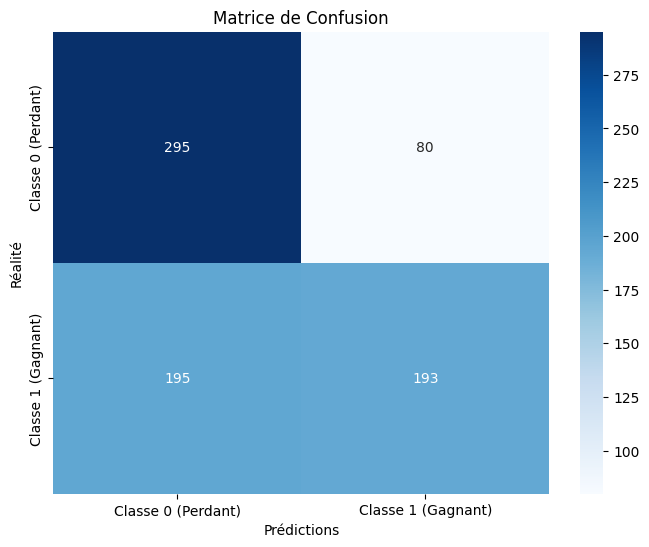

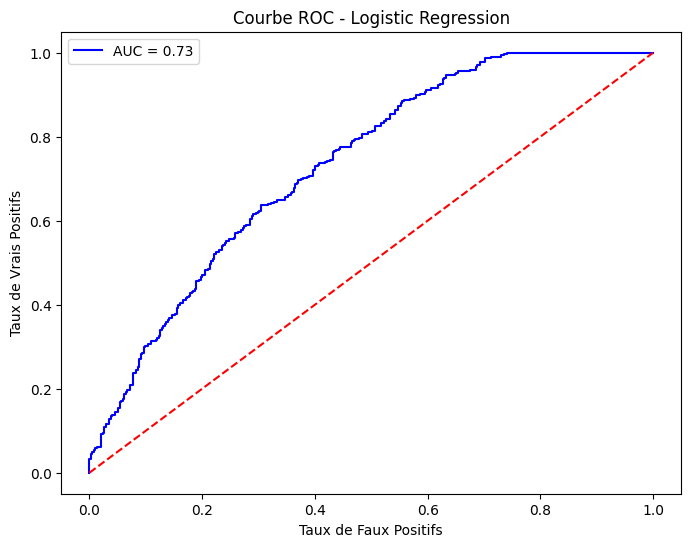

In [21]:
logreg10_model = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1_000, C=10).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg10_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg10_model.score(X_test, y_test)))

y_pred_prob_logreg10 = logreg10_model.predict_proba(X_test)[:, 1]  

threshold = 0.6 # Vous pouvez ajuster ce seuil
y_pred_binary_logreg10 = (y_pred_prob_logreg10 >= threshold).astype(int)

# Calculer la précision
accuracy_logreg10 = accuracy_score(y_test, y_pred_binary_logreg10)
print(f"Accuracy (Régression Logistique): {accuracy_logreg10:.4f}")

# Calculer la matrice de confusion
cm_logreg10 = confusion_matrix(y_test, y_pred_binary_logreg10)

# Afficher la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg10, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'], yticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion')
plt.show()

# Calculer la courbe ROC et l'AUC
fpr_logreg10, tpr_logreg10, thresholds = roc_curve(y_test, y_pred_prob_logreg10)
roc_auc_logreg10 = roc_auc_score(y_test, y_pred_prob_logreg10)

# Afficher la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg10, tpr_logreg10, color='blue', label=f'AUC = {roc_auc_logreg10:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - Logistic Regression')
plt.legend()
plt.show()


## Decision tree

In [22]:
tree_model = DecisionTreeClassifier(random_state=42)

In [23]:
param_grid_tree = {
    'max_depth': [None, 5, 10, 20], 
    'min_samples_split': [2, 10, 20]
}

grid_search_tree = GridSearchCV(tree_model, param_grid_tree, cv=5, verbose=2)

grid_search_tree.fit(X_train, y_train)

print("Meilleurs paramètres (Arbre de Décision):", grid_search_tree.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................max_depth=None, min_samples_split=2; total time=   0.4s
[CV] END ................max_depth=None, min_samples_split=2; total time=   0.5s
[CV] END ................max_depth=None, min_samples_split=2; total time=   0.6s
[CV] END ................max_depth=None, min_samples_split=2; total time=   0.2s
[CV] END ................max_depth=None, min_samples_split=2; total time=   0.2s
[CV] END ...............max_depth=None, min_samples_split=10; total time=   0.1s
[CV] END ...............max_depth=None, min_samples_split=10; total time=   0.2s
[CV] END ...............max_depth=None, min_samples_split=10; total time=   0.1s
[CV] END ...............max_depth=None, min_samples_split=10; total time=   0.1s
[CV] END ...............max_depth=None, min_samples_split=10; total time=   0.1s
[CV] END ...............max_depth=None, min_samples_split=20; total time=   0.0s
[CV] END ...............max_depth=None, min_samp

In [24]:
print("Meilleurs paramètres (Arbre de Décision):\n", grid_search_tree.best_params_)

results_tree = pl.DataFrame(grid_search_tree.cv_results_)
display(results_tree.filter(
    pl.col("rank_test_score") <= 6
))

Meilleurs paramètres (Arbre de Décision):
 {'max_depth': 5, 'min_samples_split': 10}


mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
f64,f64,f64,f64,object,i64,struct[2],f64,f64,f64,f64,f64,f64,f64,i32
0.465631,0.151412,0.019882,0.030484,null,2,"{null,2}",0.558952,0.617904,0.569869,0.558952,0.606127,0.582361,0.02482,6
0.100424,0.037235,0.001576,0.001031,5,2,"{5,2}",0.578603,0.626638,0.626638,0.60262,0.588621,0.604624,0.019526,2
0.063999,0.005611,0.002064,0.001344,5,10,"{5,10}",0.578603,0.626638,0.626638,0.60262,0.59081,0.605061,0.019184,1
0.059172,0.007746,0.000909,0.000066,5,20,"{5,20}",0.578603,0.626638,0.622271,0.60262,0.59081,0.604188,0.018259,3
0.136316,0.015552,0.000974,0.000102,20,2,"{20,2}",0.548035,0.60917,0.569869,0.582969,0.606127,0.583234,0.022867,5
0.161457,0.017427,0.001266,0.000222,20,20,"{20,20}",0.567686,0.600437,0.582969,0.578603,0.595186,0.584976,0.011721,4


In [25]:
best_tree_model = grid_search_tree.best_estimator_
best_tree_model.fit(X_train, y_train)

print("Training set score: {:.3f}".format(grid_search_tree.score(X_train, y_train)))
print("Test set score: {:.3f}".format(grid_search_tree.score(X_test, y_test)))

y_pred_tree = best_tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy (Arbre de Décision): {accuracy_tree:.4f}")

Training set score: 0.656
Test set score: 0.620
Accuracy (Arbre de Décision): 0.6199


In [45]:
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.55      0.58       411
           1       0.54      0.62      0.58       352

    accuracy                           0.58       763
   macro avg       0.58      0.58      0.58       763
weighted avg       0.59      0.58      0.58       763



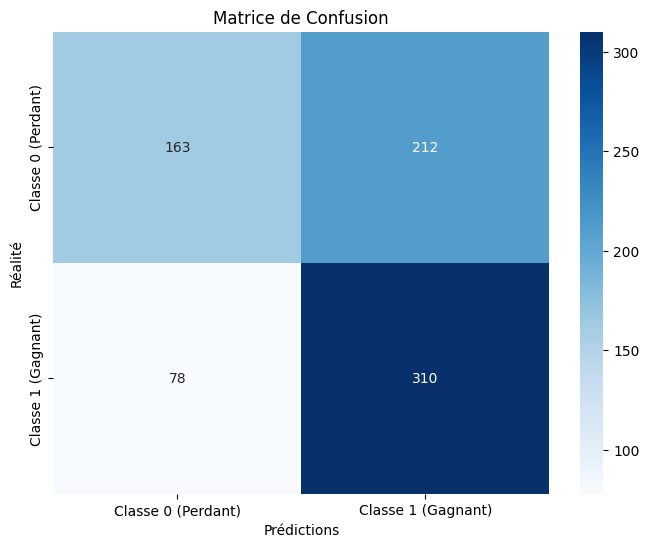

In [26]:
cm_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'], yticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion')
plt.show()


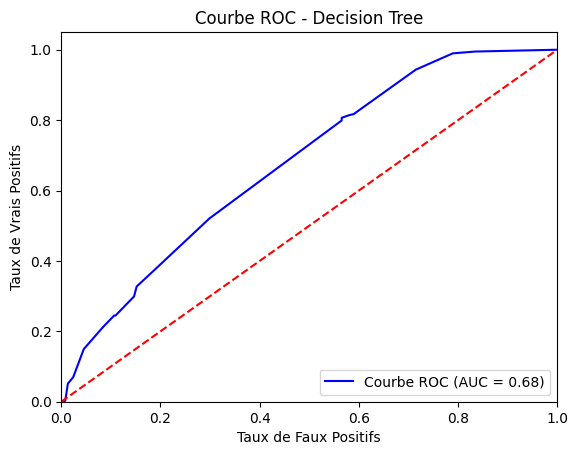

In [27]:
fpr_tree, tpr_tree, _ = roc_curve(y_test, best_tree_model.predict_proba(X_test)[:, 1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure()
plt.plot(fpr_tree, tpr_tree, color='blue', label=f"Courbe ROC (AUC = {roc_auc_tree:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - Decision Tree')
plt.legend(loc="lower right")
plt.show()


## Random Forest

In [29]:
rf_model = RandomForestClassifier(n_jobs= -1, random_state=42)

In [30]:
%%time
param_grid_rf = {
    'n_estimators': [400, 600, 800, 1000],
    'max_depth': [5,  10, 20, 30, 40],
    'max_samples' : [0.8],
    'max_features' : ['sqrt'],
    'min_samples_split' : [2,4,6],
    'min_samples_leaf' : [1,3,5]
}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, verbose=2)
grid_search_rf.fit(X_train, y_train)

print("Meilleurs paramètres (Random Forest):", grid_search_rf.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END max_depth=5, max_features=sqrt, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   3.1s
[CV] END max_depth=5, max_features=sqrt, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=600; tota

d:\Cours_M2\webscraping\ml-webscrap-tennis\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Meilleurs paramètres (Random Forest): {'max_depth': 10, 'max_features': 'sqrt', 'max_samples': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 400}
CPU times: total: 1h 56min 43s
Wall time: 1h 12min 18s


In [31]:
results_rf = pl.DataFrame(grid_search_rf.cv_results_)
display(results_rf.filter(
    pl.col("rank_test_score") <= 6
))

mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
f64,f64,f64,f64,i64,str,f64,i64,i64,i64,struct[6],f64,f64,f64,f64,f64,f64,f64,i32
3.631898,0.162441,0.210859,0.01133,10,"""sqrt""",0.8,1,6,400,"{10,""sqrt"",0.8,1,6,400}",0.637555,0.679039,0.670306,0.641921,0.612691,0.648302,0.023888,1
8.151689,0.053508,0.45651,0.028791,10,"""sqrt""",0.8,1,6,1000,"{10,""sqrt"",0.8,1,6,1000}",0.648472,0.672489,0.657205,0.646288,0.610503,0.646991,0.020438,5
4.925466,0.253593,0.331057,0.115636,10,"""sqrt""",0.8,3,2,600,"{10,""sqrt"",0.8,3,2,600}",0.637555,0.683406,0.672489,0.639738,0.608315,0.648301,0.026852,2
5.401957,0.59419,0.326498,0.097409,10,"""sqrt""",0.8,3,4,600,"{10,""sqrt"",0.8,3,4,600}",0.637555,0.683406,0.672489,0.639738,0.608315,0.648301,0.026852,2
4.796241,0.235069,0.272889,0.00804,10,"""sqrt""",0.8,3,6,600,"{10,""sqrt"",0.8,3,6,600}",0.637555,0.683406,0.672489,0.639738,0.608315,0.648301,0.026852,2
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
6.190228,0.244482,0.353062,0.030545,30,"""sqrt""",0.8,5,4,800,"{30,""sqrt"",0.8,5,4,800}",0.644105,0.668122,0.661572,0.650655,0.608315,0.646554,0.02086,6
6.342749,0.177227,0.338632,0.015827,30,"""sqrt""",0.8,5,6,800,"{30,""sqrt"",0.8,5,6,800}",0.644105,0.668122,0.661572,0.650655,0.608315,0.646554,0.02086,6
6.326013,0.152755,0.549943,0.150622,40,"""sqrt""",0.8,5,2,800,"{40,""sqrt"",0.8,5,2,800}",0.644105,0.668122,0.661572,0.650655,0.608315,0.646554,0.02086,6


In [32]:
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)

print("Training set score: {:.3f}".format(best_rf_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(best_rf_model.score(X_test, y_test)))

y_pred_rf = best_rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Arbre de Décision): {accuracy_rf:.4f}")

Training set score: 0.969
Test set score: 0.630
Accuracy (Arbre de Décision): 0.6304


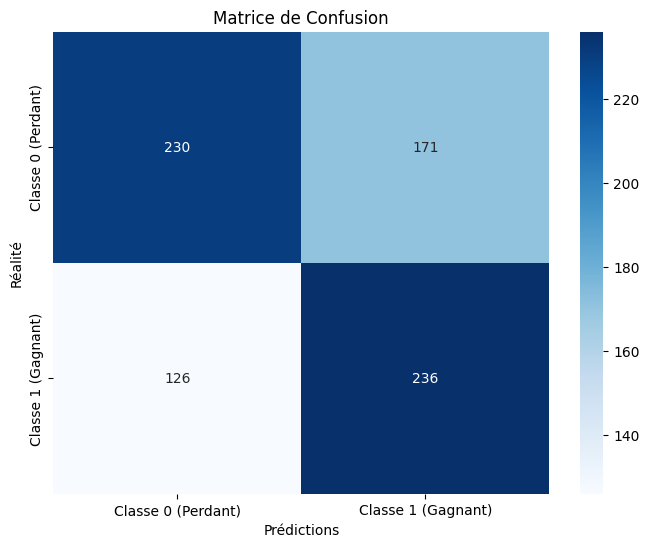

In [19]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'], yticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion')
plt.show()

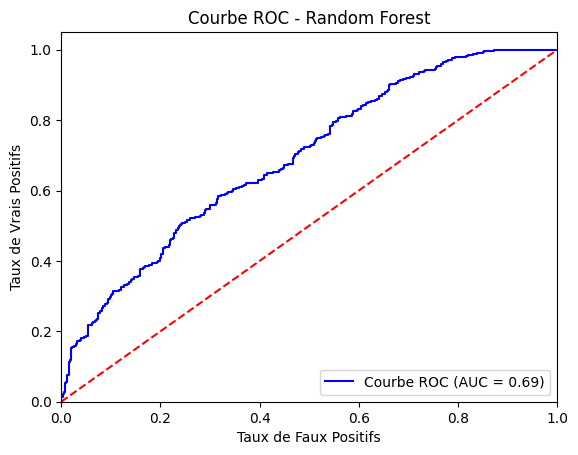

In [20]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', label=f"Courbe ROC (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()


## XGBoost

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   1.0s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.6s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=400; total time=   0.7s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=400; total time=   0.8s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=400; total time=   0.5s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=400; total time=   0.6s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=400; total time=   0.6s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=600; total time=   1.0s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=600; total time=   1.0s
[CV] END .learning_rate=0.00

mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
f64,f64,f64,f64,f64,i64,i64,struct[3],f64,f64,f64,f64,f64,f64,f64,i32
0.646774,0.009208,0.003194,0.000102,0.01,3,400,"{0.01,3,400}",0.626638,0.661572,0.635371,0.624454,0.643326,0.638272,0.01344,3
1.072091,0.198578,0.005454,0.002495,0.01,3,600,"{0.01,3,600}",0.637555,0.663755,0.628821,0.617904,0.643326,0.638272,0.01536,2
0.349235,0.005414,0.003379,0.000825,0.1,3,200,"{0.1,3,200}",0.648472,0.655022,0.626638,0.626638,0.63895,0.639144,0.011419,1
1.488996,0.557772,0.00351,0.000108,0.1,6,200,"{0.1,6,200}",0.646288,0.646288,0.628821,0.626638,0.641138,0.637835,0.008491,4
2.150637,0.166558,0.005185,0.000543,0.1,6,400,"{0.1,6,400}",0.633188,0.657205,0.631004,0.615721,0.647702,0.636964,0.014325,5
2.755051,0.191407,0.006896,0.000948,0.1,6,600,"{0.1,6,600}",0.637555,0.639738,0.628821,0.620087,0.654267,0.636094,0.011444,6


Training set score: 0.895
Test set score: 0.638
Accuracy (XGBoost): 0.6383


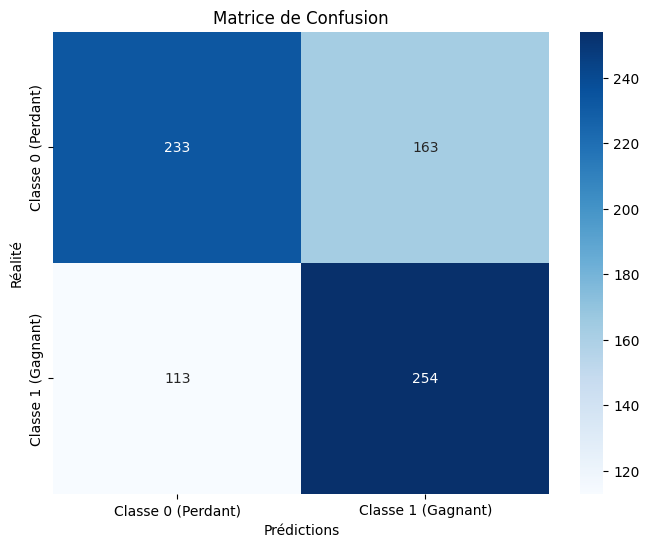

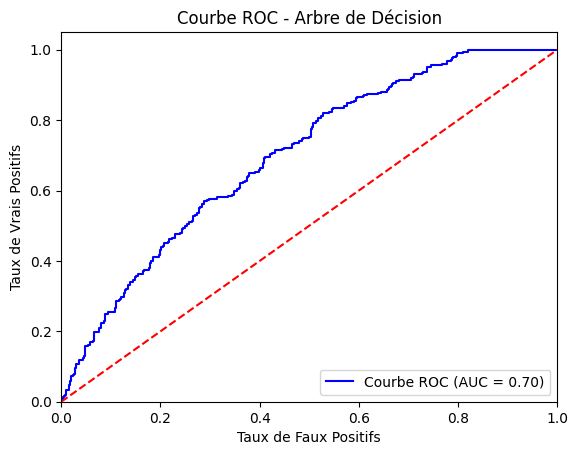

In [32]:
xgb_model = xgb.XGBClassifier(random_state=42)
param_grid_xgb = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [200, 400, 600]
}
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, verbose=2)

grid_search_xgb.fit(X_train, y_train)
print("Meilleurs paramètres (XGBoost):", grid_search_xgb.best_params_)

print("Meilleurs paramètres (XGBoost):\n", grid_search_xgb.best_params_)

results_tree = pl.DataFrame(grid_search_xgb.cv_results_)
display(results_tree.filter(
    pl.col("rank_test_score") <= 6
))
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_model.fit(X_train, y_train)

print("Training set score: {:.3f}".format(best_xgb_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(best_xgb_model.score(X_test, y_test)))

y_pred_xgb = best_xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy (XGBoost): {accuracy_xgb:.4f}")

cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'], yticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion')
plt.show()

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='blue', label=f"Courbe ROC (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - Arbre de Décision')
plt.legend(loc="lower right")
plt.show()


## SVM

In [63]:
svm_model = SVC(probability=True, random_state=42)

In [64]:
cv_scores_svm = []
for train_idx, test_idx in tqdm(cv.split(X_train), total=cv.get_n_splits(), desc="Validation croisée (SVM)"):
    X_train_cv, X_test_cv = X_train[train_idx], X_train[test_idx]
    y_train_cv, y_test_cv = y_train[train_idx], y_train[test_idx]
    svm_model.fit(X_train_cv, y_train_cv)
    score = svm_model.score(X_test_cv, y_test_cv)
    cv_scores_svm.append(score)

print("CV Scores (SVM):", cv_scores_svm)


Validation croisée (SVM): 100%|██████████| 5/5 [00:22<00:00,  4.51s/it]

CV Scores (SVM): [0.6502636203866432, 0.616871704745167, 0.5834797891036907, 0.632688927943761, 0.6379613356766256]


In [65]:
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, verbose=0)

with tqdm(total=len(param_grid_svm['C']) * len(param_grid_svm['kernel']), desc="Recherche des meilleurs paramètres (SVM)") as pbar:
    grid_search_svm.fit(X_train, y_train)
    pbar.update(1)

print("Meilleurs paramètres (SVM):", grid_search_svm.best_params_)


Recherche des meilleurs paramètres (SVM):   0%|          | 0/6 [00:00<?, ?it/s]

: 

: 

In [ ]:
best_svm_model = grid_search_svm.best_estimator_
best_svm_model.fit(X_train, y_train)

y_pred_svm = best_svm_model.predict(X_test)

In [ ]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM): {accuracy_svm:.4f}")


In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'], yticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion')
plt.show()


In [ ]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, best_svm_model.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='blue', label=f"Courbe ROC (AUC = {roc_auc_svm:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - Arbre de Décision')
plt.legend(loc="lower right")
plt.show()

## KNN

In [79]:
knn_model = KNeighborsClassifier()

In [81]:
param_grid_tree = {
    'n_neighboors'
}

grid_search_knn = GridSearchCV(tree_model, param_grid_tree, cv=5, verbose=2)

grid_search_knn.fit(X_train, y_train)

print("Meilleurs paramètres (KNN):", grid_search_knn.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................max_depth=None, min_samples_split=2; total time=   0.3s
[CV] END ................max_depth=None, min_samples_split=2; total time=   0.7s
[CV] END ................max_depth=None, min_samples_split=2; total time=   0.2s
[CV] END ................max_depth=None, min_samples_split=2; total time=   0.2s
[CV] END ................max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END ...............max_depth=None, min_samples_split=10; total time=   0.0s
[CV] END ...............max_depth=None, min_samples_split=10; total time=   0.0s
[CV] END ...............max_depth=None, min_samples_split=10; total time=   0.0s
[CV] END ...............max_depth=None, min_samples_split=10; total time=   0.0s
[CV] END ...............max_depth=None, min_samples_split=10; total time=   0.0s
[CV] END ...............max_depth=None, min_samples_split=20; total time=   0.0s
[CV] END ...............max_depth=None, min_samp

In [82]:
best_knn_model = grid_search_knn.best_estimator_
best_knn_model.fit(X_train, y_train)

y_pred_knn = best_knn_model.predict(X_test)

In [83]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn:.4f}")


Accuracy (KNN): 0.5819


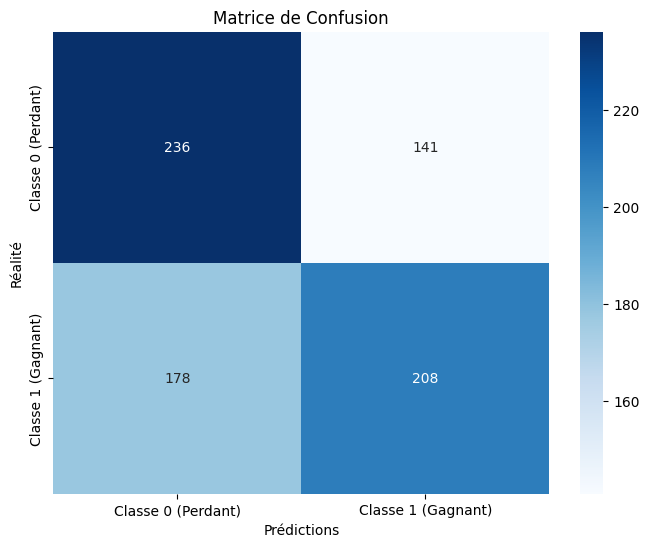

In [84]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'], yticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion')
plt.show()

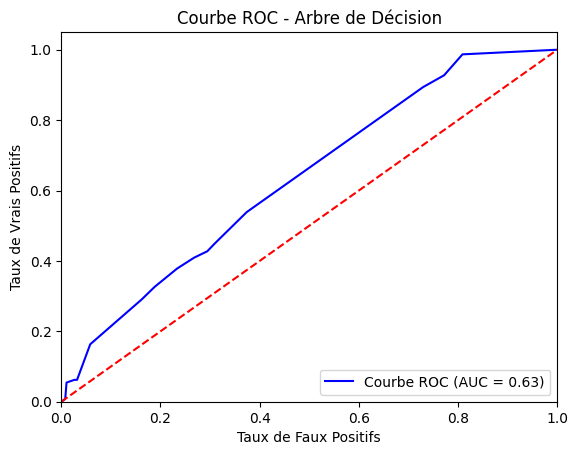

In [85]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, best_knn_model.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', label=f"Courbe ROC (AUC = {roc_auc_knn:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - Arbre de Décision')
plt.legend(loc="lower right")
plt.show()

# TEST